In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [83]:
data = pd.read_csv('C:/Users/dmqa/Desktop/workspace/Today-I-Learned/2022-1-MultivariateStatisticalAnalysisForDataMining/loan_data.csv')
print(data)

       AGE  TOT_LOAN  TOT_LOAN_CRD  LOAN_BNK  LOAN_CPT  CRDT_CNT  GUARN_CNT  \
0       40         6             6         6         0         0          0   
1       35         9             9         0         0         1          0   
2       55         9             9         0         0         0          0   
3       55        42             0        42         0         5          0   
4       40        36            36        36         0         3          1   
...    ...       ...           ...       ...       ...       ...        ...   
43381   50        63            63         0         0         0          0   
43382   50         0             0         0         0         1          0   
43383   45        42            42         0        42         0          0   
43384   35         0             0         0         0         1          0   
43385   25         9             9         9         0         0          0   

       INCOME  LOAN_CRD_CNT  LATE_RATE  ...  CALL_T

In [84]:
data.describe()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,TARGET
count,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000
mean,46.250980,82.019407,32.829622,49.324897,4.288641,3.004264,0.098695,2778.629051,0.163855,8.216406,6.389619,373.254506,0.024662,2.098970,75.477804,534.423547,18.433320,13.757664,0.425068,0.095238
std,9.693741,126.702976,83.419760,92.443944,12.660968,1.842478,0.529664,2470.097227,0.617522,12.120840,14.556618,690.067030,0.206476,15.364253,62.311464,382.237230,133.523351,53.272289,0.494359,0.293547
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.430000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,36.000000,9.000000,9.000000,0.000000,3.000000,0.000000,3600.000000,0.000000,3.000000,0.000000,190.000000,0.000000,0.990000,60.000000,700.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,102.000000,27.000000,60.000000,3.000000,4.000000,0.000000,4700.000000,0.000000,11.000000,10.000000,390.000000,0.000000,1.887500,80.000000,900.000000,0.000000,0.000000,1.000000,0.000000
max,70.000000,994.000000,994.000000,944.000000,301.000000,11.000000,10.000000,10000.000000,11.000000,100.000000,100.000000,10000.000000,6.000000,1520.000000,950.000000,1200.000000,2700.000000,1200.000000,1.000000,1.000000


In [85]:
y = data.iloc[:,-1]
dummys = pd.get_dummies(data.iloc[:,19:22])
print(dummys)

       SEX_F  SEX_M  PAY_METHOD_A  PAY_METHOD_B  PAY_METHOD_C  PAY_METHOD_D  \
0          0      1             1             0             0             0   
1          0      1             0             0             1             0   
2          0      1             0             0             1             0   
3          0      1             0             1             0             0   
4          1      0             0             1             0             0   
...      ...    ...           ...           ...           ...           ...   
43381      0      1             0             0             0             1   
43382      1      0             0             0             0             1   
43383      0      1             0             0             0             1   
43384      1      0             0             0             0             1   
43385      1      0             0             0             0             1   

       JOB_A  JOB_B  JOB_C  JOB_D  
0          1   

In [86]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
43381    1
43382    1
43383    1
43384    1
43385    1
Name: TARGET, Length: 43386, dtype: int64


In [87]:
data = data.drop(['SEX', 'PAY_METHOD', 'JOB', 'TARGET'], axis=1)
X = pd.concat([data.iloc[:,:22],dummys], axis=1)
print(X)

       AGE  TOT_LOAN  TOT_LOAN_CRD  LOAN_BNK  LOAN_CPT  CRDT_CNT  GUARN_CNT  \
0       40         6             6         6         0         0          0   
1       35         9             9         0         0         1          0   
2       55         9             9         0         0         0          0   
3       55        42             0        42         0         5          0   
4       40        36            36        36         0         3          1   
...    ...       ...           ...       ...       ...       ...        ...   
43381   50        63            63         0         0         0          0   
43382   50         0             0         0         0         1          0   
43383   45        42            42         0        42         0          0   
43384   35         0             0         0         0         1          0   
43385   25         9             9         9         0         0          0   

       INCOME  LOAN_CRD_CNT  LATE_RATE  ...  SEX_F 

In [88]:
X.columns

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'SEX_F', 'SEX_M',
       'PAY_METHOD_A', 'PAY_METHOD_B', 'PAY_METHOD_C', 'PAY_METHOD_D', 'JOB_A',
       'JOB_B', 'JOB_C', 'JOB_D'],
      dtype='object')

<AxesSubplot:>

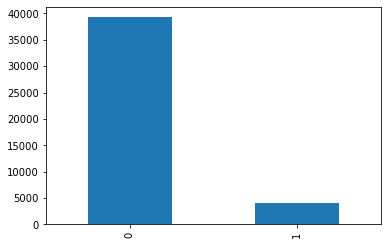

In [90]:
y.value_counts().plot(kind = 'bar')

In [91]:
print(y.value_counts())
print(y.value_counts(normalize=True)*100)

0    39254
1     4132
Name: TARGET, dtype: int64
0    90.47619
1     9.52381
Name: TARGET, dtype: float64


In [92]:
X.isna().sum()

AGE              0
TOT_LOAN         0
TOT_LOAN_CRD     0
LOAN_BNK         0
LOAN_CPT         0
CRDT_CNT         0
GUARN_CNT        0
INCOME           0
LOAN_CRD_CNT     0
LATE_RATE        0
LATE_RATE_1Y     0
INS_MON_MAX      0
CANCEL_CNT_1Y    0
CALL_TIME        0
TEL_COST_MON     0
MOBILE_PRICE     0
SUSP_DAY         0
LATE_TEL         0
COMB_COMM        0
SEX_F            0
SEX_M            0
PAY_METHOD_A     0
PAY_METHOD_B     0
PAY_METHOD_C     0
PAY_METHOD_D     0
JOB_A            0
JOB_B            0
JOB_C            0
JOB_D            0
dtype: int64

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34708, 29)
(8678, 29)
(34708,)
(8678,)


In [94]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

0    31402
1     3306
Name: TARGET, dtype: int64
0    0.904748
1    0.095252
Name: TARGET, dtype: float64
0    7852
1     826
Name: TARGET, dtype: int64
0    0.904817
1    0.095183
Name: TARGET, dtype: float64


In [95]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)